In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2022-04-06 15:14:36.012350


# Kuvaileva analytiikka

## Alkuvalmistelut

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Kaavioiden prosenttiakselin muotoiluun
from matplotlib.ticker import PercentFormatter
ticks = PercentFormatter(xmax=100, decimals=0, symbol=' %')

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')

# Muuttujien tekstimuotoisia arvoja
sukup = ['mies', 'nainen']
koulutus = ['peruskoulu', '2. aste', 'korkeakoulu', 'ylempi korkeakoulu']
tyytyväisyys = ['erittäin tyytymätön', 'tyytymätön', 'siltä väliltä', 
                'tyytyväinen', 'erittäin tyytyväinen']

## Frekvenssitaulukko kategoriselle muuttujalle

In [4]:
df1 = pd.crosstab(df['koulutus'], 'f')

df1.columns.name = ''
df1.index = koulutus
df1['%'] = df1/df1.sum()*100

df1

,f,%
peruskoulu,27,33.333333
2. aste,30,37.037037
korkeakoulu,22,27.160494
ylempi korkeakoulu,2,2.469136


## Frekvenssien graafinen esittäminen

Frekvensseistä voin laatia kaavion eri tavoilla

* Kaavio frekvenssitaulukosta
* Kaavio alkuperäisestä datasta **countplot**-funktiolla
* Kaavio alkuperäisestä datasta **histplot**-funktiolla

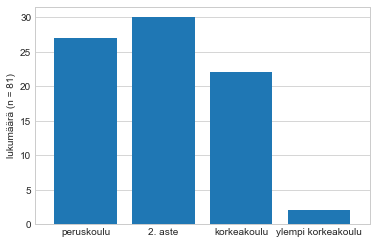

In [5]:
# Kaavio frekvenssitaulukosta
df1['f'].plot.bar(width=0.8, rot=0)

plt.ylabel(f'lukumäärä (n = {df1["f"].sum()})')
plt.grid(axis='x')

([<matplotlib.axis.XTick at 0x2a4d9e37220>,
 [Text(0, 0, 'peruskoulu'),
  Text(1, 0, '2. aste'),
  Text(2, 0, 'korkeakoulu'),
  Text(3, 0, 'ylempi korkeakoulu')])

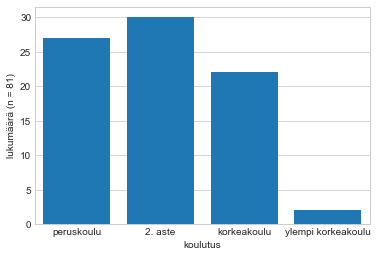

In [6]:
# Kaavio alkuperäisestä datasta
# color- ja saturation-parametreilla kaaviosta saa saman värisen kuin edellä
sns.countplot(x='koulutus', data=df, color='C0', saturation=1)

plt.ylabel(f'lukumäärä (n = {df["koulutus"].count()})')
plt.xticks([0, 1, 2, 3], koulutus)

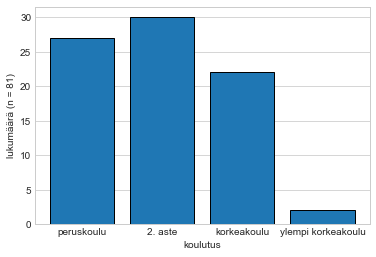

In [7]:
# Kaavio histplot-funktiolla
# alpha-parametri määrittää pylväiden "läpinäkyvyyden"
sns.histplot(x='koulutus', data=df, discrete=True, shrink=0.8, alpha=1)

plt.ylabel(f'lukumäärä (n = {df["koulutus"].count()})')
plt.xticks([1, 2, 3, 4], koulutus)
plt.grid(axis='x')

## Frekvenssiprosenttien graafinen esittäminen

Frekvenssiprosenteista voin laatia kaavion eri tavoilla

* Kaavio frekvenssitaulukosta
* Kaavio alkuperäisestä datasta **barplot**-funktiolla
* Kaavio alkuperäisestä datasta **histplot**-funktiolla

Itse lasken mieluiten aina ensin frekvenssitaulukon ja laadin kaavion frekvenssitaulukon prosenteista.

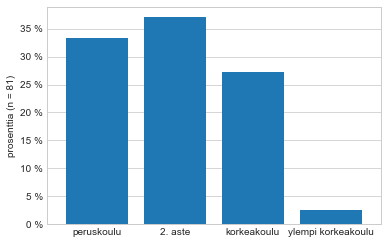

In [8]:
# Prosenttikaavio frekvenssitaulukosta
df1['%'].plot.bar(width=0.8, rot=0)

plt.ylabel(f'prosenttia (n = {df1["f"].sum()})')
plt.gca().yaxis.set_major_formatter(ticks)
plt.grid(axis='x')

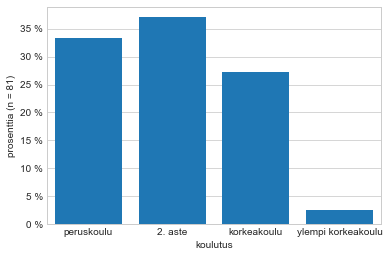

In [9]:
# Prosenttikaavio barplot-funktiolla

n = df['työtov'].count()

sns.barplot(x='koulutus', y='koulutus', data=df, estimator=lambda x:len(x)/n*100, 
            color='C0', saturation=1)

plt.ylabel(f'prosenttia (n = {n})')
plt.xticks([0, 1, 2, 3], koulutus)
plt.gca().yaxis.set_major_formatter(ticks)

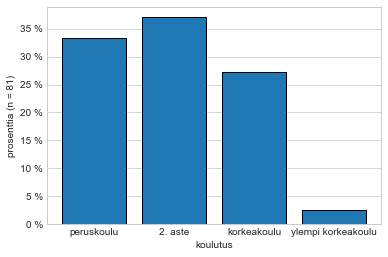

In [10]:
# Prosenttikaavio histplot-funktiolla
sns.histplot(df['koulutus'], stat='percent', discrete=True, shrink=0.8, alpha=1)

plt.ylabel(f'prosenttia (n = {df["koulutus"].count()})')
plt.xticks([1, 2, 3, 4], koulutus)
plt.gca().yaxis.set_major_formatter(ticks)
plt.grid(axis='x')

## Frekvenssit dikotomisille (dummy) muuttujille

Datassa muuttujat työterv, lomaosa, kuntosa ja hieroja ovat dikotomisia (onko käyttänyt kyseistä etuutta?).

In [11]:
dikot = ['työterv', 'lomaosa', 'kuntosa', 'hieroja']

df2 = df[dikot].count().to_frame('f').sort_values('f', ascending=False)
df2['% vastaajista'] = df2/df.shape[0]*100

df2

,f,% vastaajista
työterv,47,57.317073
hieroja,22,26.829268
lomaosa,20,24.390244
kuntosa,9,10.975610


Text(0, 0.5, 'lukumäärä')

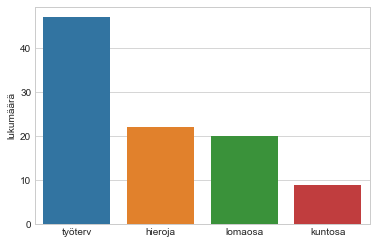

In [12]:
# Muuttujien frekvenssien mukainen järjestys
list = df[dikot].sum().sort_values(ascending=False).index

sns.barplot(data=df[list], estimator=sum)

plt.ylabel('lukumäärä')

## Puuttuvat havainnot

Muuttuja **työtov** (tyytyväisyys työtovereihin) mitattiin 5-portaisella asteikolla (1=erittäin tyytymätön, 5=erittäin tyytyväinen). Yhdeltä henkilöltä puuttui vastaus tähän kysymykseen. Kokonaislukutyyppiselle muuttujalla (int) ei sallita puuttuvia arvoja, joten tämä muuttuja on liukulukutyyppinen (float) toisin kuin muut tyytyväisyysmuuttujat. Tämä ei yleensä analysoinnin kannalta aiheuta mitään ongelmia eikä sitä mitenkään erikseen tarvitse huomioida.

Huomiota vaativa ongelma on se, että kukaan ei ollut 'erittäin tyytymätön' työtovereihin eli vastausvaihtoehtoa 1 ei ole kukaan valinnut. Se puuttuu myös frekvenssitaulukosta. Olisi kuitenkin hyvä näyttää kyseinen vaihtoehto frekvenssitaulukossa.

Tämä onnistuu vaihtamalla muuttujan tyypiksi **category**.

In [13]:
# Tässä ei näy arvoa 1.0 (erittäin tyytymätön), koska kukaan ei sitä valinnut
df3 = pd.crosstab(df['työtov'], 'f')

df3.columns.name = ''
df3['%'] = df3/df3.sum()*100

df3

,f,%
työtov,,
2.0,3,3.703704
3.0,16,19.753086
4.0,35,43.209877
5.0,27,33.333333


In [14]:
# Teen uuden muuttujan, jonka tyyppi on category
df['työtov_cat'] = pd.Categorical(df['työtov'], categories=[1, 2, 3, 4, 5], ordered=True)

In [15]:
# dropna-parametrin ansiosta myös 'erittäin tyytymätön' tulee frekvenssitaulukkoon mukaan
df4 = pd.crosstab(df['työtov_cat'], 'f', dropna=False)

df4.columns.name = ''
df4.index = tyytyväisyys
df4['%'] = df4/df4.sum()*100

df4

,f,%
erittäin tyytymätön,0,0.000000
tyytymätön,3,3.703704
siltä väliltä,16,19.753086
tyytyväinen,35,43.209877
erittäin tyytyväinen,27,33.333333


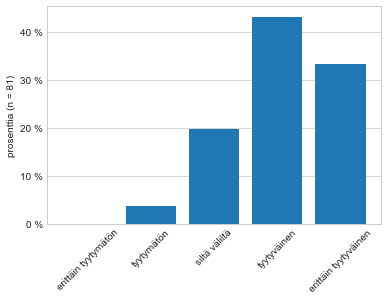

In [16]:
# Prosenttikaavio frekvenssitaulukosta

df4['%'].plot.bar(width=0.8, rot=45)

plt.ylabel(f'prosenttia (n = {df4["f"].sum()})')
plt.gca().yaxis.set_major_formatter(ticks)
plt.grid(axis='x')

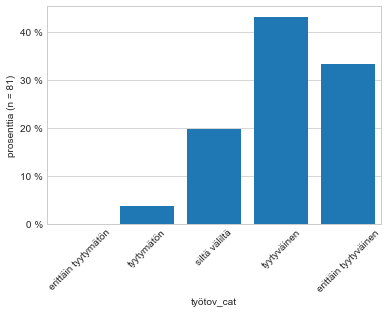

In [17]:
# Prosenttikaavio barplot-funktiolla
# category-tyyppisten muuttujien kohdalla y-parametrille pitää antaa arvoksi jokin numeerinen muuttuja!

n = df['työtov_cat'].count()

sns.barplot(x='työtov_cat', y='nro', data=df, estimator=lambda x:len(x)/n*100, 
            color='C0', saturation=1)

plt.ylabel(f'prosenttia (n = {n})')
plt.xticks([0, 1, 2, 3, 4], tyytyväisyys, rotation=45)
plt.gca().yaxis.set_major_formatter(ticks)

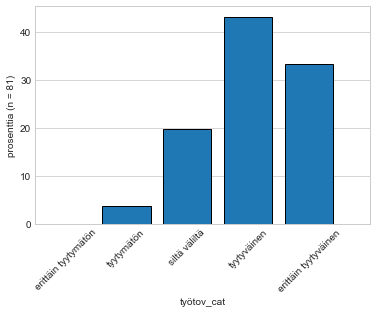

In [18]:
# Prosenttikaavio histplot-funktiolla
sns.histplot(df['työtov_cat'], stat='percent', discrete=True, shrink=0.8, alpha=1)

plt.ylabel(f'prosenttia (n = {df["työtov_cat"].count()})')
plt.xticks([1, 2, 3, 4, 5], tyytyväisyys, rotation=45)
plt.xlim(0.5, 6)
plt.grid(axis='x')

## Usean kaavion kuvio

For-toistorakennetta käyttäen voin esittää usean muuttujan jakaumat yhtä aikaa.

Text(0, 0.5, 'lukumäärä')

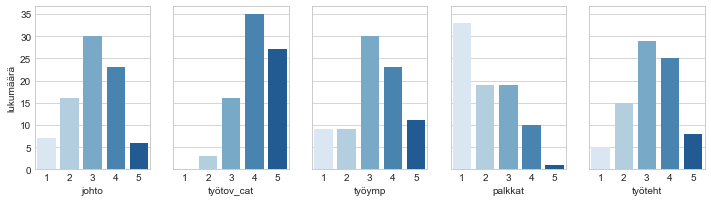

In [19]:
tyytyväisyydet = ['johto', 'työtov_cat', 'työymp', 'palkkat', 'työteht']

fig, axes = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(12, 3))

for i, var in enumerate(tyytyväisyydet):
    sns.countplot(x=var, data=df, ax=axes[i], palette='Blues')
    axes[i].set_ylabel('')

axes[0].set_ylabel('lukumäärä')

## Luokiteltu jakauma

Määrällisen muuttujan voin luokitella pandas-kirjaston **cut**-funktiolla. Oletuksena luokat eivät sisällä luokan alarajaa, mutta sisältävät ylärajan.

**Hist**- ja **histplot**-funktiot tuottavat kuitenkin luokituksen, jossa luokat sisältävät alarajan, mutta eivät ylärajaa.

Jos haluan cut-funktion tuottamien luokkien olevan yhdenmukaisia histogrammin kanssa, käytän cut-funktion yhteydessä parametria `right=False`. Tämänkin jälkeen voi tulla eroa viimeisen luokan ylärajan kohdalla, joka histogrammissa sisältyy luokkaan.

In [20]:
bins = [19, 29, 39, 49, 59, 69]
df['ikäluokka'] = pd.cut(df['ikä'], bins=bins, right=False)

df5 = pd.crosstab(df['ikäluokka'], 'f')

df5.columns.name = ''
df5['f (%)'] = df5/df5.sum()*100

df5

,f,f (%)
ikäluokka,,
"[19, 29)",14,17.073171
"[29, 39)",30,36.585366
"[39, 49)",25,30.487805
"[49, 59)",11,13.414634
"[59, 69)",2,2.439024


([<matplotlib.axis.XTick at 0x2a4d9f33ee0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

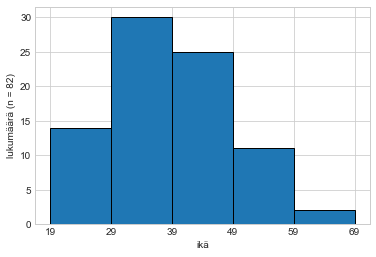

In [21]:
df['ikä'].hist(bins=bins, edgecolor='black')

plt.xlabel('ikä')
plt.ylabel(f'lukumäärä (n = {df["ikä"].count()})')
plt.xticks(bins)

([<matplotlib.axis.XTick at 0x2a4db1d8790>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

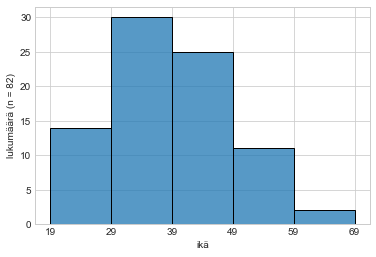

In [22]:
# Seabornin histplot tuottaa samanlaisen histogrammin

sns.histplot(df['ikä'], bins=bins)

plt.ylabel(f'lukumäärä (n = {df["ikä"].count()})')
plt.xticks(bins)

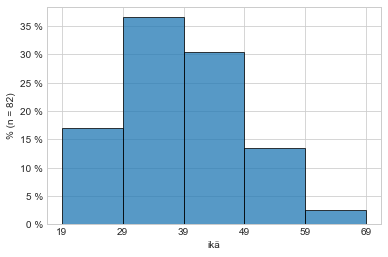

In [23]:
# Prosentit hist-kaavioon

n = df['ikä'].count()

df['ikä'].hist(bins=bins, weights=np.ones(n)/n*100, edgecolor='black', alpha=0.75)

plt.xlabel('ikä')
plt.ylabel(f'% (n = {n})')

plt.xticks(bins)
plt.gca().yaxis.set_major_formatter(ticks)

Text(0, 0.5, '% (n = 82)')

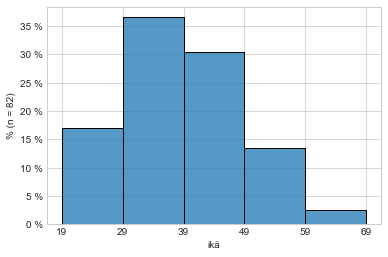

In [24]:
# Prosentit histplot-kaavioon

sns.histplot(df['ikä'], bins=bins, stat='percent')

plt.xticks(bins)
plt.gca().yaxis.set_major_formatter(ticks)

plt.xlabel('ikä')
plt.ylabel(f'% (n = {df["ikä"].count()})')

## Tilastolliset tunnusluvut

In [25]:
# Palkan tunnuslukuja
df['palkka'].describe()

count      82.000000
mean     2563.878049
std       849.350302
min      1521.000000
25%      2027.000000
50%      2320.000000
75%      2808.000000
max      6278.000000
Name: palkka, dtype: float64

<AxesSubplot:xlabel='palkka'>

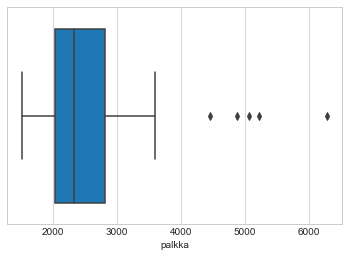

In [26]:
# Ruutu- ja janakaavio palkalle
sns.boxplot(x='palkka', data=df, saturation=1)

In [27]:
# Tunnuslukuja tyytyväisyyksille
df.loc[:, 'johto':'työteht'].describe()

,johto,työtov,työymp,palkkat,työteht
count,82.000000,81.000000,82.000000,82.000000,82.000000
mean,3.060976,4.061728,3.219512,2.109756,3.195122
std,1.058155,0.826826,1.154961,1.111179,1.047502
min,1.000000,2.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,3.000000,1.000000,3.000000
50%,3.000000,4.000000,3.000000,2.000000,3.000000
75%,4.000000,5.000000,4.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


Text(0.5, 0, 'tyytyväisyyskeskiarvo (5 = erittäin tyytyväinen)')

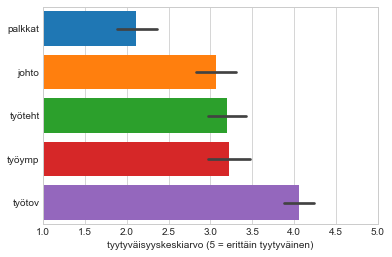

In [28]:
# Tyytyväisyysmuuttujien lista keskiarvon mukaisessa järjestyksessä
list1 = df.loc[:,'johto':'työteht'].mean().sort_values().index

# Keskiarvoja kuvaavat pylväät ja virhemarginaalit
sns.barplot(data=df[list1], orient='h', saturation=1)

plt.xlim(1, 5)
plt.xlabel('tyytyväisyyskeskiarvo (5 = erittäin tyytyväinen)')

In [29]:
hatco = pd.read_excel('https://taanila.fi/hatco.xlsx')
hatco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  100 non-null    int64  
 1   Delivery Speed      100 non-null    float64
 2   Price Level         100 non-null    float64
 3   Price Flexibility   100 non-null    float64
 4   Manufacturer Image  100 non-null    float64
 5   Service             100 non-null    float64
 6   Salesforce Image    100 non-null    float64
 7   Product Quality     100 non-null    float64
 8   Satisfaction Level  100 non-null    float64
 9   Firm size           100 non-null    int64  
 10  Usage level %       100 non-null    int64  
 11  Industry type       100 non-null    int64  
 12  Buying situation    100 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 10.3 KB


In [30]:
# Tunnuslukuja mielikuva-muuttujille
hatco.loc[:, 'Delivery Speed':'Satisfaction Level'].describe()

,Delivery Speed,Price Level,Price Flexibility,Manufacturer Image,Service,Salesforce Image,Product Quality,Satisfaction Level
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.515000,2.364000,7.894000,5.248000,2.916000,2.665000,6.971000,4.771000
std,1.320726,1.195659,1.386502,1.131414,0.751258,0.770855,1.585241,0.855558
min,0.000000,0.200000,5.000000,2.500000,0.700000,1.100000,3.700000,3.200000
25%,2.500000,1.475000,6.700000,4.575000,2.400000,2.200000,5.800000,4.100000
50%,3.400000,2.150000,8.050000,5.000000,3.000000,2.600000,7.150000,4.850000
75%,4.600000,3.225000,9.100000,6.000000,3.425000,3.000000,8.325000,5.400000
max,6.100000,5.400000,10.000000,8.200000,4.600000,4.600000,10.000000,6.800000


(0.0, 10.0)

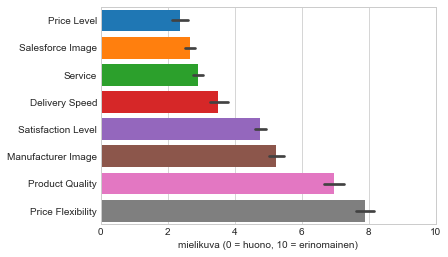

In [31]:
# Mielikuvamuuttujat keskiarvojen mukaisessa järjestyksessä
list2 = hatco.loc[:,'Delivery Speed':'Satisfaction Level'].mean().sort_values().index

# Keskiarvot ja virhemarginaalit
sns.barplot(data=hatco[list2], orient='h', saturation=1)

plt.xlabel('mielikuva (0 = huono, 10 = erinomainen)')
plt.xlim(0, 10)

(0.0, 10.0)

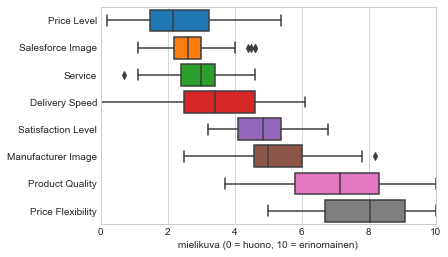

In [32]:
# Ruutu- ja janakaaviot mielikuvamuuttujista
sns.boxplot(data=hatco[list2], orient='h', saturation=1)

plt.xlabel('mielikuva (0 = huono, 10 = erinomainen)')
plt.xlim(0, 10)